#### Discrete Simulation 
#### Inclass L3
Authored: Austin Jetrin Maddison 6481268

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from my_settings import *

In [2]:
np.random.seed(27)

Archimedes aproximation of $\pi$

In [105]:
def pi_approx_archimedes(Pn, n, i):
    if i == 0:
        return Pn
    
    P2n = (2 * Pn) / (1 + np.sqrt(1 + (Pn / n)**2))
    return pi_approx_archimedes(P2n, n * 2, i - 1)
    
n = 3
pi_approx_archimedes(np.sqrt(3)*2*3, 4, 3)


2.7890877511671297

Infinite Series approximation of $\pi$

In [4]:
def pi_approx_infinite_series(x, n, i=2):
    if n - i <= 0:
        return x * 4
    
    x += 1/(i*2 - 1) * (-1 if (i % 2 == 0) else 1)
    return pi_approx_infinite_series(x, n, i + 1)
    
pi_approx_infinite_series(1, 1000)

3.142593654340044

Uniform sampling approximation of $\pi$

3.1296

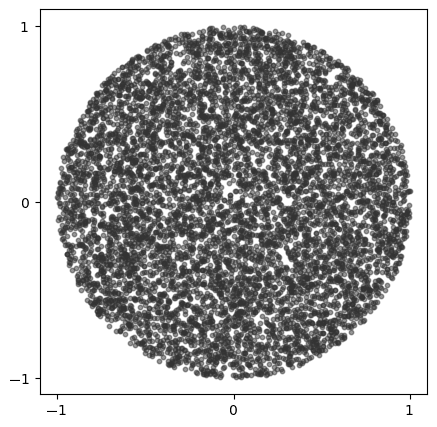

In [5]:
def pi_approx_distance_probability(n, viz=False):
    xs = (np.random.ranf((n, 1)) - 0.5) * 2
    ys = (np.random.ranf((n, 1)) - 0.5) * 2
    dist = np.sqrt(xs**2 + ys**2)
    inside =  dist <= 1
    
    if viz:
        plt.figure(figsize = (5, 5))
        plt.scatter(xs[inside], ys[inside], s=10, alpha= 0.5, color=(0.2, 0.2, 0.2), )
        plt.xticks([-1,0, 1])
        plt.yticks([-1,0, 1])
    
    return np.mean(inside) * 4

pi_approx_distance_probability(10000, viz=True)

In [6]:
N = 10000
correct = np.zeros((N, 1), dtype=bool)

for i in range(N):
    x = np.zeros((3, 1), dtype=bool)
    x[np.random.randint(0, 3)] = True
    correct[i] = x[np.random.randint(0, 3, 1)] == True

print(np.mean(correct))


0.3329


Monty Hall Problem

In [7]:
def monty_hall(N, switch):
    correct = np.zeros(N, dtype=bool)
    
    for i in range(N):
        car = np.random.randint(0, 3)
        my_choice = np.random.randint(0, 3)
    
        available_doors = {0, 1, 2} - {my_choice, car}
        host_open = list(available_doors)[0]
    
        host_offer = {0, 1, 2} - {my_choice, host_open}
        
        # switch my answer
        if switch:
            my_choice = list(host_offer)[0]
        correct[i] = my_choice == car
    
    return np.mean(correct)

print(monty_hall(100000, switch=True))  # ~2/3 correct, switch choice
print(monty_hall(100000, switch=False)) # ~1/3 correct, don't switch choice

0.66762
0.3335
